<a href="https://colab.research.google.com/github/mmaithani/Wine-Quality-api/blob/main/EAI6010_Mod_4%265_Mohit_20250624.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Using an “Off-the-shelf” Model (EAI6010.80321.202535)
> Submitted by: Mohit

[Github Notebook link](https://github.com/mmaithani/Python/blob/master/EAI6010_Mod_4_Mohit_20250616.ipynb)

# Module 5: Wine Classifier

In [ ]:
# — Colab Setup —e
# installing torch and importing the reqyuired libraries
!pip install torch torchvision pandas scikit-learn matplotlib

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader, random_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 43.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

## Load and inspect the data  
Here I load the red-wine data from UCI, look at its shape, and check basic statistics to understand the features.

In [ ]:
# Let;s Load & preprocess the Wine Quality data
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/' +
                 'wine-quality/winequality-red.csv', sep=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000




## Create a binary quality label  
I define `good = quality ≥ 7` so we can turn this into a two-class problem.

In [ ]:
df['good'] = (df.quality >= 7).astype(int)   # make binary target
X = df.drop(['quality','good'], axis=1).values
y = df.good.values




## Standardize features  
Standardizing helps the neural network learn faster. I use `StandardScaler` to give each feature zero mean and unit variance.

In [ ]:
# standardize inputs
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# train/val split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
# convert to PyTorch tensors & loaders
tX_train, tX_val = map(torch.tensor, (X_train, X_val))
ty_train, ty_val = map(torch.tensor, (y_train, y_val))
train_ds = TensorDataset(tX_train.float(), ty_train.long())
val_ds   = TensorDataset(tX_val.float(),   ty_val.long())
train_dl = DataLoader(train_ds, batch_size=32, shuffle=True)
val_dl   = DataLoader(val_ds,   batch_size=32)

In [ ]:
# Define a simple FC network
class WineNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(11, 64)
        self.fc2 = nn.Linear(64, 32)
        self.out = nn.Linear(32, 2)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.out(x)

In [ ]:
# Training routine
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = WineNet().to(device)
opt   = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss()

def train_epoch():
    model.train()
    total_loss = 0
    for xb,yb in train_dl:
        xb,yb = xb.to(device), yb.to(device)
        pred = model(xb)
        loss = loss_fn(pred, yb)
        opt.zero_grad(); loss.backward(); opt.step()
        total_loss += loss.item()
    return total_loss/len(train_dl)

def validate():
    model.eval()
    correct, total = 0,0
    with torch.no_grad():
        for xb,yb in val_dl:
            xb,yb = xb.to(device), yb.to(device)
            pred = model(xb).argmax(dim=1)
            correct += (pred==yb).sum().item()
            total   += len(yb)
    return correct/total

In [ ]:
# Train & logs
epochs = 20
train_losses, val_accuracies = [], []
for epoch in range(epochs):
    tl = train_epoch()
    va = validate()
    train_losses.append(tl); val_accuracies.append(va)
    print(f'Epoch {epoch+1}/{epochs} — Loss: {tl:.4f}, Val Acc: {va:.4f}')

Epoch 1/20 — Loss: 0.5169, Val Acc: 0.8656
Epoch 2/20 — Loss: 0.3404, Val Acc: 0.8656
Epoch 3/20 — Loss: 0.2939, Val Acc: 0.8969
Epoch 4/20 — Loss: 0.2789, Val Acc: 0.8969
Epoch 5/20 — Loss: 0.2717, Val Acc: 0.8875
Epoch 6/20 — Loss: 0.2660, Val Acc: 0.8906
Epoch 7/20 — Loss: 0.2639, Val Acc: 0.9000
Epoch 8/20 — Loss: 0.2603, Val Acc: 0.8906
Epoch 9/20 — Loss: 0.2586, Val Acc: 0.8875
Epoch 10/20 — Loss: 0.2527, Val Acc: 0.8938
Epoch 11/20 — Loss: 0.2489, Val Acc: 0.9031
Epoch 12/20 — Loss: 0.2473, Val Acc: 0.9000
Epoch 13/20 — Loss: 0.2431, Val Acc: 0.8906
Epoch 14/20 — Loss: 0.2396, Val Acc: 0.9000
Epoch 15/20 — Loss: 0.2396, Val Acc: 0.9000
Epoch 16/20 — Loss: 0.2351, Val Acc: 0.9031
Epoch 17/20 — Loss: 0.2349, Val Acc: 0.9031
Epoch 18/20 — Loss: 0.2303, Val Acc: 0.8906
Epoch 19/20 — Loss: 0.2268, Val Acc: 0.9000
Epoch 20/20 — Loss: 0.2266, Val Acc: 0.9062


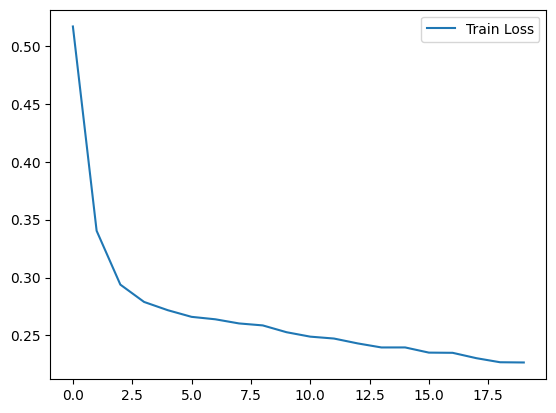

In [ ]:
# let's Plot training curve
plt.plot(train_losses, label='Train Loss')
plt.legend(); plt.show()



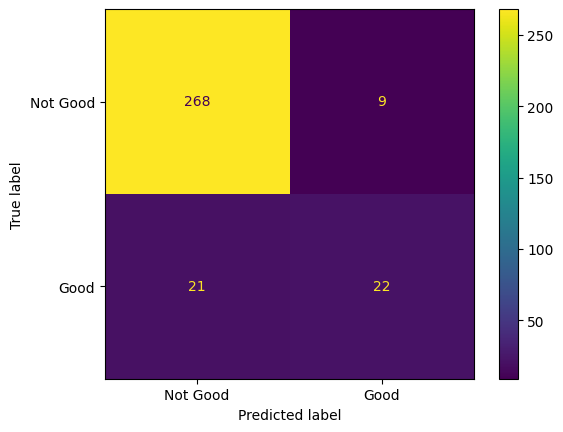

In [ ]:
# Computing and plotting confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = []
model.eval()
with torch.no_grad():
    for xb,_ in val_dl:
        y_pred += model(xb.to(device)).argmax(dim=1).cpu().numpy().tolist()
cm = confusion_matrix(y_val, y_pred)
ConfusionMatrixDisplay(cm, display_labels=['Not Good','Good']).plot()
plt.show()

## Additional metrics

In [ ]:
# Detailed classification metrics
from sklearn.metrics import classification_report

# we can generate predictions on the validation set
y_pred = []
model.eval()
with torch.no_grad():
    for xb, _ in val_dl:
        preds = model(xb.to(device)).argmax(dim=1).cpu().numpy()
        y_pred.extend(preds)

print(classification_report(
    y_val,
    y_pred,
    target_names=['Not Good','Good'],
    digits=4
))


              precision    recall  f1-score   support

    Not Good     0.9273    0.9675    0.9470       277
        Good     0.7097    0.5116    0.5946        43

    accuracy                         0.9062       320
   macro avg     0.8185    0.7396    0.7708       320
weighted avg     0.8981    0.9062    0.8996       320



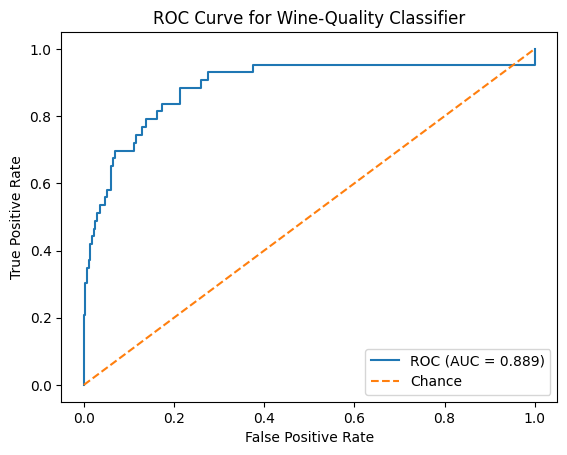

In [ ]:
# ROC curve and AUC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# get predicted probabilities for the “good” class
y_prob = []
model.eval()
with torch.no_grad():
    for xb, _ in val_dl:
        probs = torch.softmax(model(xb.to(device)), dim=1)[:,1].cpu().numpy()
        y_prob.extend(probs)

fpr, tpr, _ = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC (AUC = {roc_auc:.3f})')
plt.plot([0,1], [0,1], linestyle='--', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Wine-Quality Classifier')
plt.legend()
plt.show()


# saving the weights for api integhration

In [ ]:
# 1. Save your model
torch.save(model.state_dict(), "model.pth")

# 2. Download to your computer
from google.colab import files
files.download("model.pth")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

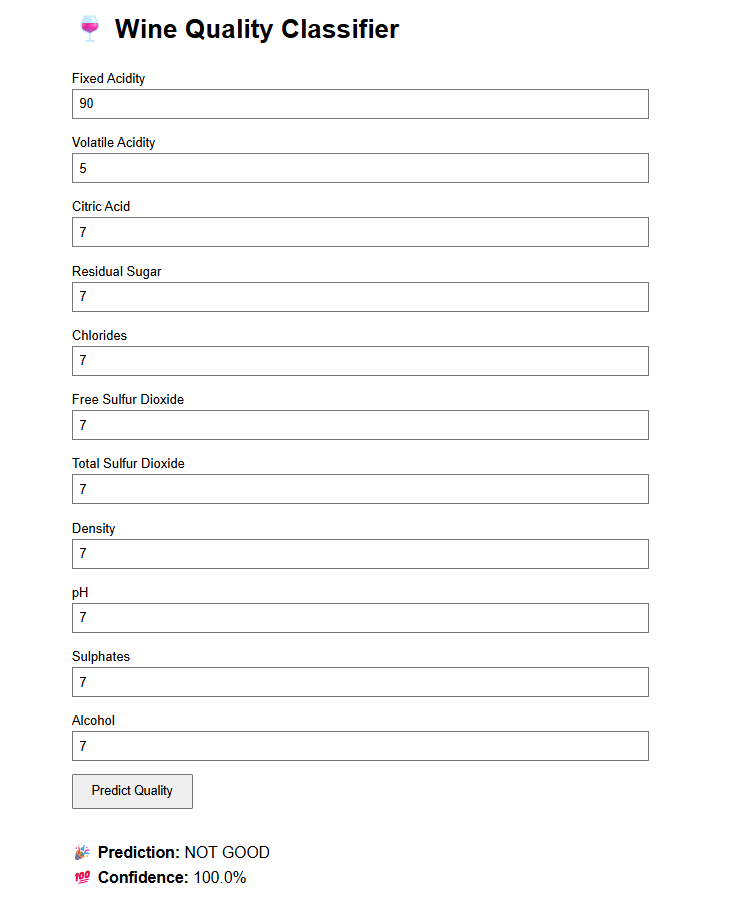